In [21]:
#!/usr/bin/env python3

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
# sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/data')
# print(sys.path)

# Import the data
df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")

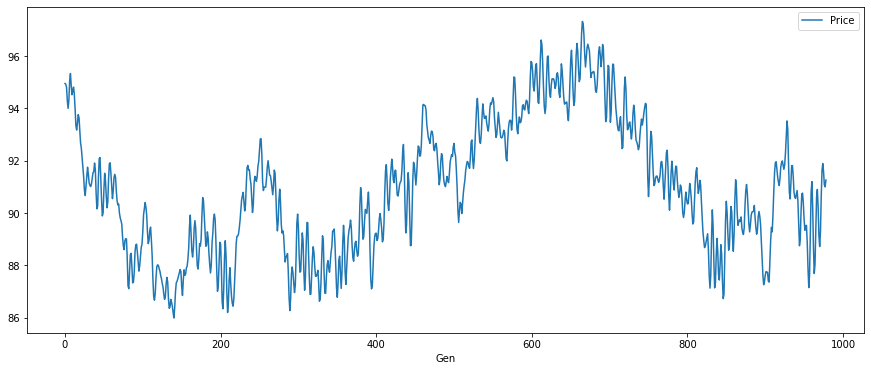

In [22]:

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()

if df['Rep'].sum() != 0:
        df.plot(x="Gen", y = ['Rep'],
                kind="line", figsize=(15, 6))
        plt.show()


In [23]:

if df['Spoils'].sum() != 0:
        df.plot(x="Gen", y = ['Spoils'],
                kind="line", figsize=(15, 6))
        plt.show()

        df.plot(x="Gen", y = ['PerSpoils'],
                kind="line", figsize=(15, 6))
        plt.show()

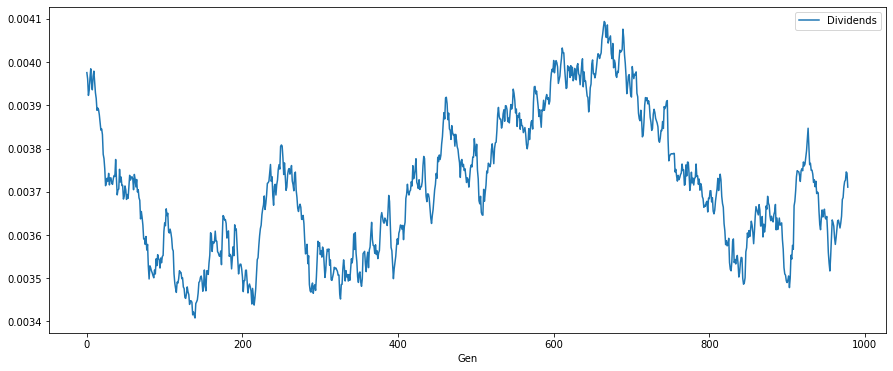

In [24]:
df.plot(x="Gen", y = ["Dividends"],
        kind="line", figsize=(15, 6))
plt.show()



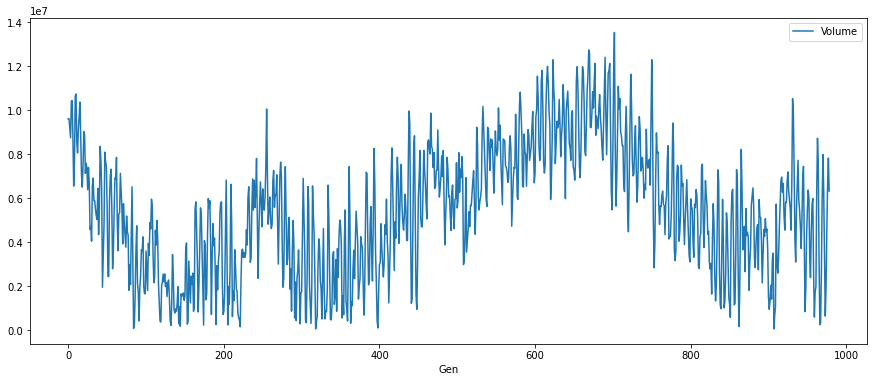

In [25]:
df.plot(x="Gen", y = ['Volume'],
        kind="line", figsize=(15, 6))
plt.show()

In [26]:
window = 21  # trading days in rolling window
dpy = 252  # trading days per year
ann_factor = dpy / window
time_horizon = 252 

# df['log_rtn'] = np.log(df['Price']).diff()
# df['real_var'] = df['log_rtn'].rolling(window).var() * ann_factor
# df['real_vol'] = np.sqrt(df['real_var'])

# df['real_var'] = np.square(df['log_rtn']).rolling(window).sum() * ann_factor
# df['real_vol'] = np.sqrt(df['real_var'])

# df.plot(x="Gen", y = ['real_vol'],
#         kind="line", figsize=(15, 6))
# plt.show()


# corr = df['real_vol'].corr(df['Volume'])
# print(corr)
# df['Volatility (1Y EMA, x2M)'] = pd.Series.ewm(2000000 * df['real_vol'], span=time_horizon).mean()
# df['Volume (1Y EMA)'] = pd.Series.ewm(df['Volume'], span=time_horizon).mean()
# df.plot(x="Gen", y = ["Volatility (1Y EMA, x2M)", "Volume (1Y EMA)"],
#         kind="line", figsize=(15, 6))
# # plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/volume_volatility.png', dpi = 300)
# plt.show()


# corr = df['real_vol'].corr(df['AvgMonReturn'])
# print(corr)
# df['Average Monthly Returns (10Y EMA, %)'] = pd.Series.ewm(100 * df['AvgMonReturn'], span=10*time_horizon).mean()[50:]
# df['Volatility (1Y EMA, x10)'] = pd.Series.ewm(10 * df['real_vol'], span=time_horizon).mean()[50:]
# df.plot(x="Gen", y = ["Volatility (1Y EMA, x10)", "Average Monthly Returns (10Y EMA, %)"],
#         kind="line", figsize=(15, 6))
# # plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/returns_volatility.png', dpi = 300)
# plt.show()



In [27]:
''' Slow decay of autocorrelation in absolute returns '''

absolute_autocorrelations = []
for i in range(21):
        absolute_autocorrelations.append(abs(df['AvgMonReturn']).autocorr(lag=i))
plt.plot(absolute_autocorrelations)
plt.title('Autocorrelations of absolute returns over lags')
plt.show()

''' Heavy tails '''

kurtosis = df['AvgMonReturn'].kurtosis()
print('kurtosis: ' + str(kurtosis))
skew = df['AvgMonReturn'].skew()
print('skewness: ' + str(skew))

print('mean/std ratio')
print(df['AvgMonReturn'].mean() / df['AvgMonReturn'].std())


KeyError: 'AvgMonReturn'

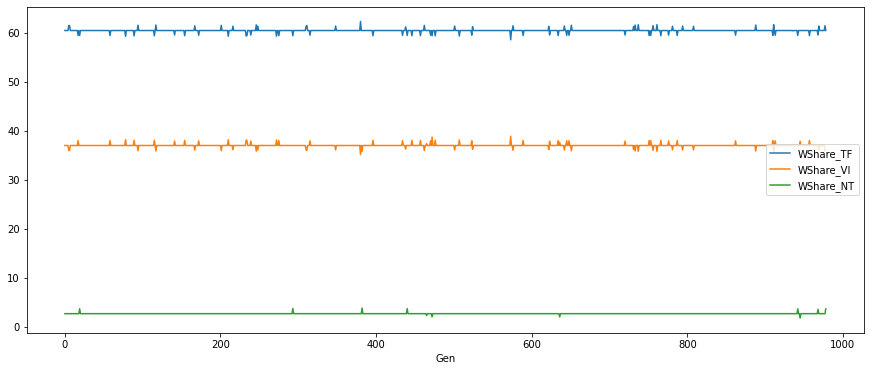

In [28]:
df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/share_evo.png', dpi = 300)
plt.show()




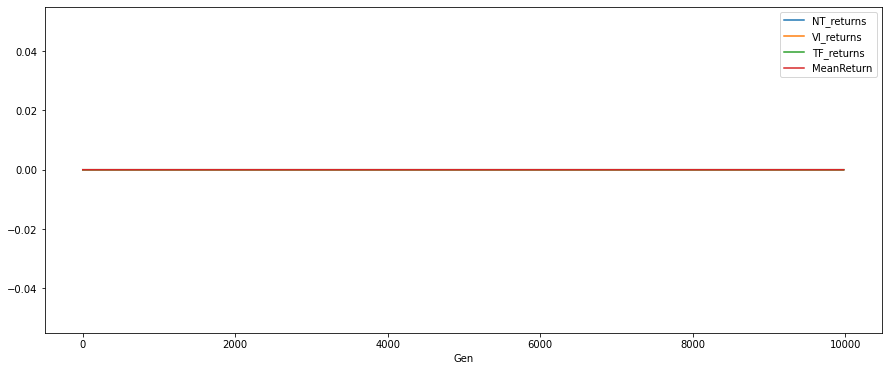

In [ ]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns", 'MeanReturn'],
        kind="line", figsize=(15, 6))
plt.show()

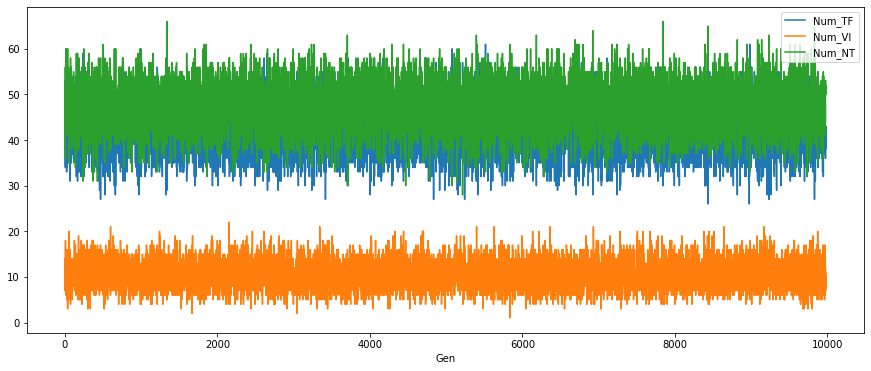

In [ ]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/num_evo.png', dpi = 300)
plt.show()

Average wealth per fund in the strategy


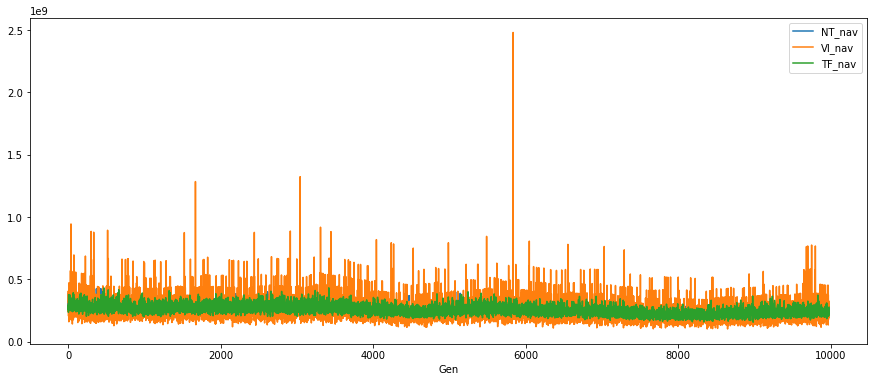

In [ ]:
''' NAV '''
print('Average wealth per fund in the strategy')
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


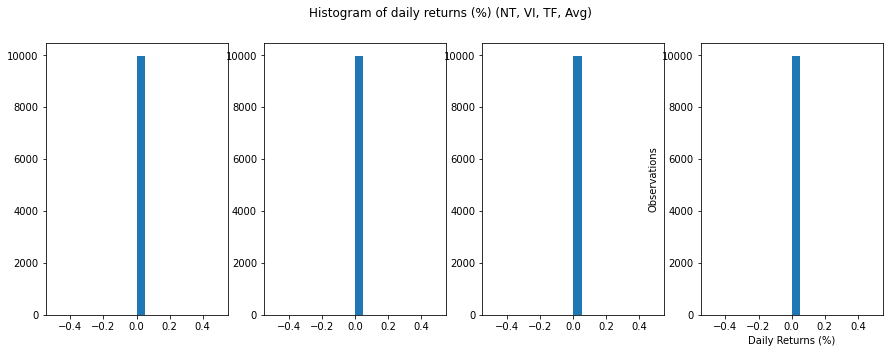

In [ ]:
''' Histogram of the daily strategy returns '''

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5), sharex = True)
fig.suptitle('Histogram of daily returns (%) (NT, VI, TF, Avg)')
ax1.hist(100 * df['NT_returns'], bins = 20)
ax2.hist(100 * df['VI_returns'], bins = 20)
ax3.hist(100 * df['TF_returns'], bins = 20)
ax4.hist(100 * df['MeanReturn'], bins = 20)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Daily Returns (%)')
plt.show()






nan
nan
nan
nan


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6731: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/matplotlib/axes/_axes.py:6732: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

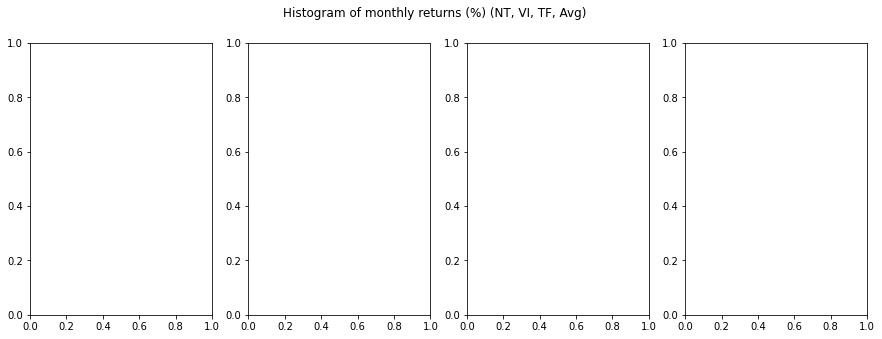

In [ ]:
print(df['NT_MonReturns'].mean())
print(df['VI_MonReturns'].mean())
print(df['TF_MonReturns'].mean())
print(df['AvgMonReturn'].mean())

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15, 5))
fig.suptitle('Histogram of monthly returns (%) (NT, VI, TF, Avg)')
ax1.hist(100 * df['NT_MonReturns'], bins = 20)
ax1.axvline(x=100 * df['NT_MonReturns'].mean(), color='r', linestyle='dashed', linewidth=2)
num = 100 * df['NT_MonReturns'].mean()
ax1.set_title('NT Returns - Mean: %1.3f' % num)

ax2.hist(100 * df['VI_MonReturns'], bins = 20)
num = 100 * df['VI_MonReturns'].mean()
ax2.set_title('VI Returns - Mean: %1.3f' % num)
ax2.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax3.hist(100 * df['TF_MonReturns'], bins = 20)
num = 100 * df['TF_MonReturns'].mean()
ax3.set_title('TF Returns - Mean: %1.3f' % num)
ax3.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax4.hist(100 * df['AvgMonReturn'], bins = 20)
num = 100 * df['AvgMonReturn'].mean()
ax4.set_title('Average Returns - Mean: %1.3f' % num)
ax4.axvline(x=num, color='r', linestyle='dashed', linewidth=2)

ax4.set_ylabel('Observations')
ax4.set_xlabel('Monthly Returns (%)')
plt.savefig('/Users/aymericvie/Documents/GitHub/evology/evology/figures/hist_returns.png')
plt.show()

time_horizon = 252

df['NT_MonReturns_ema'] = pd.Series.ewm(100 * df['NT_MonReturns'], span=time_horizon).mean()
df['VI_MonReturns_ema'] = pd.Series.ewm(100 * df['VI_MonReturns'], span=time_horizon).mean()
df['TF_MonReturns_ema'] = pd.Series.ewm(100 * df['TF_MonReturns'], span=time_horizon).mean()
df['AvgMonReturn_ema'] = pd.Series.ewm(100 * df['AvgMonReturn'], span=time_horizon).mean()

''' Evolution of returns over time '''
df.plot(x="Gen", y = ["NT_MonReturns_ema", "VI_MonReturns_ema", "TF_MonReturns_ema", "AvgMonReturn_ema"],
        kind="line", figsize=(15, 6))
plt.show()

